In [1]:
import json
import psycopg2
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use("clint.mpl")
import matplotlib.dates as md

# silence annoying warning about plotting pd.datetime objects with mpl
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [10]:
def get_endpoints():
    """
    grab the current list of endpoints
    """
    cmd = "SELECT * FROM endpoint_id_map;"
    db_cursor.execute(cmd)
    record = db_cursor.fetchall()
    df_end = pd.DataFrame(record, columns=["row","endpoint_name","data_type"])
    print(df_end)
def get_cooldown_data():
    """
    8/30 note from Joule:
    It took about 12 hours to reach the lowest temperature. The first 6 hours 
    of cooling used about 5 kg of LN, and it seems like the average LN useage 
    was 4 kg/day after that (Attachment 4).
    can try the automatic x-axis date formatting:
    https://matplotlib.org/3.1.0/gallery/ticks_and_spines/date_concise_formatter.html
    https://matplotlib.org/3.1.0/api/dates_api.html#matplotlib.dates.AutoDateFormatter
    """
    endpoints = ['cage_pressure', 'cage_coldPlate_temp', 'cage_ln_level', 
                 'cage_motor_temp', 'cage_topHat_temp']
    
    df_file = "./analysis/plots/cooldown_oct.h5"
    t_earlier_aug = '2020-10-10T12:00'
    t_later_aug = '2020-10-12T18:00'
    pandas_db_query(endpoints, t_earlier_aug, t_later_aug, df_file)
    
def plot_cooldown_data():
    """
    """
    df_file = "./analysis/plots/cooldown_oct.h5"
    # df_file = "./plots/cooldown_sep.h5"
    
    with pd.HDFStore(df_file, 'r') as f:
        print("Keys:", f.keys())
    
    ln_level = pd.read_hdf(df_file, key='/cage_ln_level')
    motor_temp = pd.read_hdf(df_file, key='/cage_motor_temp')
    tophat_temp = pd.read_hdf(df_file, key='/cage_topHat_temp')
    cp_temp = pd.read_hdf(df_file, key='/cage_coldPlate_temp')
    pressure = pd.read_hdf(df_file, key='/cage_pressure')
    
    # plt.plot(ln_level["timestamp"], ln_level["cage_ln_level"], '-b')
    # plt.ylabel("LN Level", color='b', ha='right', y=1)
    
    plt.semilogy(pressure["timestamp"], 
                 pressure["cage_pressure"], '-b')
    plt.ylabel("pressure (hPa)", color='b', ha='right', y=1)
    # plt.ylim(1e-6, 1e-5)
    
    plt.tick_params('y', colors='b')
    plt.gcf().autofmt_xdate() # rotates labels
    
    p1a = plt.gca().twinx()
    p1a.plot(cp_temp["timestamp"], cp_temp["cage_coldPlate_temp"] + 273, "-r")
    p1a.set_ylabel('Cold Plate Temp (K)', color='r', ha='right', y=1)
    p1a.tick_params('y', colors='r')
    
    plt.tight_layout()
    plt.show()

Keys: ['/cage_coldPlate_temp', '/cage_ln_level', '/cage_motor_temp', '/cage_pressure', '/cage_topHat_temp']


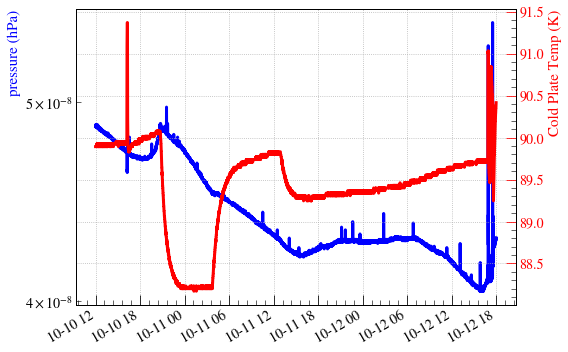

In [11]:
#global db_conn, db_cursor

#with open("config.json") as f:
#    config = json.load(f)

#db_conn = psycopg2.connect(dbname=config["db_name"], 
#                           user=config["db_user"], 
#                           password=config["password"], 
#                           host=config["cage_daq"])
#db_cursor = db_conn.cursor()

# -- run analysis -- 
#get_endpoints()
# get_cooldown_data()
plot_cooldown_data()

# get_temp()